In [137]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(os.curdir))
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier


['.git', 'bulk_test.json', 'data_values.csv', 'data_values_good.csv', 'deep_learning_1.ipynb', 'dtree_dl.ipynb', 'KNN_dl.ipynb', 'labels.csv', 'labels_good.csv', 'putLabels.py', 'XGBoost_dl.ipynb']


In [138]:
labels = pd.read_csv("labels_good.csv")
labels = labels.set_index('rider_provider')
labels['aggregate'] = labels[['wce_label','eps_label','de_label','pe_label','roe_label','growth_rate_label','profitm_label','grossm_label','ro40_label','churnrate_label','EVbyEbidta_label','marketCap_label','magicNum_label']].sum(axis = 1, skipna = True)

In [139]:
avg_labels = labels.mean(axis = 0, skipna = True).fillna(0).to_dict()
for key in labels.keys():
  labels[key] = labels[key].fillna(avg_labels[key])


In [140]:
# removed all Nan above

In [141]:

# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [142]:
labels['aggregate'] = labels['aggregate'].astype(int)
X = labels[['GrossProfit','GrossMargin','WorkingCapitalRatio','EarningPerShare','DebtToEquityRatio','PEratio','ReturnOfEquity','EBIDTAratio','EvRatio','EVbyEbidta','ChurnRate','GrowthRate','ProfitMargin','RuleOf40','MarketCap','MagicNumber']]
y = labels['aggregate']


In [143]:
X_train, X_test, y_T, y_t = train_test_split(X, y, test_size=0.3, random_state=0)

In [144]:
np.unique(labels['aggregate'].to_numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [145]:
np.unique(y_T.to_numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [146]:
classes = len(np.unique(y_T.to_numpy()))

In [147]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [148]:
def encode(y):
  result = np.zeros((len(y), 10))
  for i in range(len(y)):
    result[i][y[i]] = 1
  return result.astype(int)
    

In [149]:
encoder = LabelEncoder()
y_train= encode(y_T.to_numpy())
y_test= encode(y_t.to_numpy())


In [150]:
y_test.shape

(80, 10)

In [151]:
print(y_T)

rider_provider
1404655_2020    0
1689923_2021    0
896878_2021     6
317788_2021     1
1404655_2021    0
               ..
1803696_2021    0
1627857_2020    0
1721947_2021    0
1073349_2021    3
857005_2021     4
Name: aggregate, Length: 184, dtype: int32


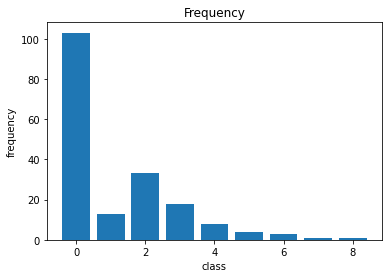

In [152]:
count = {}
for x,y in zip(X_train.to_numpy(), y_T.to_numpy()):
  if y not in count:
    count[y] = 0
  count[y] += 1

x = list(count.keys())
y = list(count.values())

plt.bar(x, y)                # plot the points in the array a
plt.title("Frequency")  # Add a title to the figure
plt.xlabel("class")    # Give a label to the x-axis
plt.ylabel("frequency");    # Give a label to the y-axis

In [176]:
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [242]:
# define baseline model
def baseline_model(classes, input_dim):
	# create model
	model = Sequential()
	model.add(InputLayer(input_shape=(input_dim)))
	model.add(Dense(8, input_dim=input_dim, activation='relu'))
	model.add(Dense(64, activation='relu'))
	# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
	# model.add(layers.Reshape((64, 1)))
	# model.add(layers.GRU(256, return_sequences=True))

	# # The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
	# model.add(layers.LSTM(128))	
	model.add(Dense(128, activation='relu'))
	model.add(layers.Dropout(0.3))
	model.add(Dense(128, activation='relu'))
	model.add(layers.Dropout(0.2))
	model.add(Dense(128, activation='relu'))
	model.add(layers.Dropout(0.3))
	model.add(Dense(256, activation='relu'))
	model.add(Dense(classes, activation='softmax'))
	# Compile model
	return model

In [243]:
import math
from tensorflow.keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from tensorflow import keras

In [244]:
model = baseline_model(10, 16)

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 8)                 136       
                                                                 
 dense_136 (Dense)           (None, 64)                576       
                                                                 
 dense_137 (Dense)           (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_138 (Dense)           (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_139 (Dense)           (None, 128)             

In [245]:
history = None  # For recording the history of training process.
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          validation_data=(X_test, y_test),
          shuffle=True,
          verbose=0)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


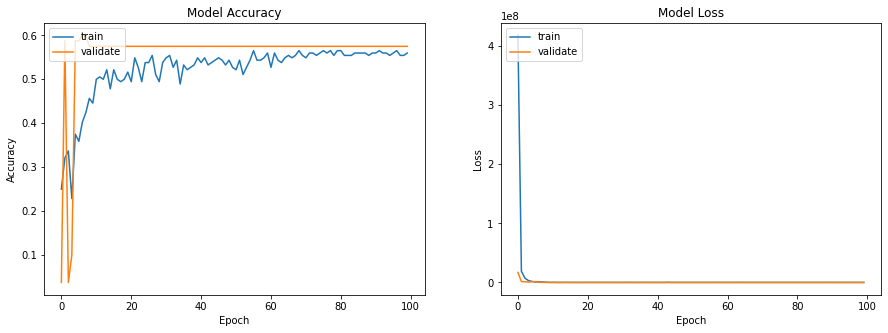

In [246]:
def plotmodelhistory(history):
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['train', 'validate'], loc = 'upper left')
    
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'validate'], loc = 'upper left')
    plt.show()
    
print(history.history.keys())

plotmodelhistory(history)

In [159]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])

<AxesSubplot:>

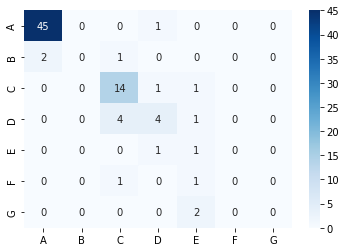

In [160]:
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
print(accuracy_score(y_test, dtree_predictions))

ValueError: inconsistent shapes